In [476]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#  matplotlib.style.use('ggplot')
%matplotlib inline

In [477]:
import os
#Задаём рабочую папку    
os.chdir("/home/botiyava/learning/subjects/algo/labn5")


In [478]:
#читаем данные
df = pd.read_csv('Chicago_hotels.csv',  decimal = ",", sep=';')
df.head()


,date1,date2,x1,x2,x3,x4
0,January,1994,44.3,104.04,51.9,72.15
1,February,1994,54.7,102.74,60.1,73.47
2,March,1994,61.9,105.23,65,74.91
3,April,1994,69.1,113.63,69.8,79.06
4,May,1994,70.8,120.77,72.4,82.07


In [479]:
#Вместо дат поставим номер месяца, а  столбцы x1,x2,x3 уберем, т.к. они не нужны нам.
#Ещё уберу строки с пропущенными значениями.
df_clean = df.drop(columns=["date1","date2","x1","x2","x3"])
df_clean = df_clean[0:112] 
df_clean.tail()

,x4
107,99.1
108,92.88
109,90.99
110,99.62
111,101.32


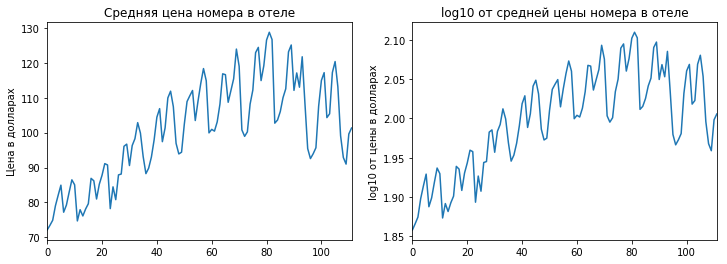

In [480]:
#Строим обычный график и график от логарифма для наших данных
df_clean=df_clean.astype(float)
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df_clean['x4'].plot(ax=ax1)
ax1.set_title('Средняя цена номера в отеле')
ax1.set_ylabel('Цена в долларах')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df_clean['x4'])).plot(ax=ax2)
ax2.set_title(u'log10 от средней цены номера в отеле')
ax2.set_ylabel(u'log10 от цены в долларах')

## Ответы на вопросы из лекции
### 1. Есть ли у ряда тренд? Да, данный ряд имеет параболический тренд
### 2. Есть ли у ряда сезонность? Да, у данного ряда наблюдается мультипликативная сезонность,т.к. размах с ростом цены увеличивается, а не остаётся в пределах одного "коридора". Именно поэтому мы строим график от логарифма, чтобы перейти к аддитивному параболическому тренду
### 3. Меняет ли ряд свой характер? Нет, не меняет
### 4. Есть ли у ряда выбросы? Нет, у данного ряда нет выбросов

In [481]:
#Будем работать с логарифмом от цены и прономеруем каждый месяц
df_0 = pd.DataFrame(np.log10(df_clean['x4']))
df_0['month_num'] = range(1, len(df_0) + 1)

df_0.head()

,x4,month_num
0,1.858236,1
1,1.866110,2
2,1.874540,3
3,1.897957,4
4,1.914184,5


In [482]:
#  Индикаторы месяцев

df_0["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0]*10)[0:len(df_0)]
df_0["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0]*10)[0:len(df_0)]
df_0["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0]*10)[0:len(df_0)]
df_0["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0]*10)[0:len(df_0)]
df_0["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0]*10)[0:len(df_0)]
df_0["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1]*10)[0:len(df_0)]

In [483]:
df_0.head(14)

,x4,month_num,m01,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,1.858236,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1.866110,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1.874540,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1.897957,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1.914184,5,0,0,0,0,1,0,0,0,0,0,0,0
5,1.929215,6,0,0,0,0,0,1,0,0,0,0,0,0
6,1.887730,7,0,0,0,0,0,0,1,0,0,0,0,0
7,1.898999,8,0,0,0,0,0,0,0,1,0,0,0,0
8,1.918712,9,0,0,0,0,0,0,0,0,1,0,0,0
9,1.936966,10,0,0,0,0,0,0,0,0,0,1,0,0


In [484]:
#Убираем базовый месяц. Я выбрал январь
X = df_0.drop(columns=["x4", "m01"])

In [485]:
#  Создаем матрицу (столбец) откликов.
y = df_0['x4']

In [486]:
#Создаём модель для нашей полиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree=2
model=make_pipeline(PolynomialFeatures(degree),LinearRegression())
model.fit(X, y)

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

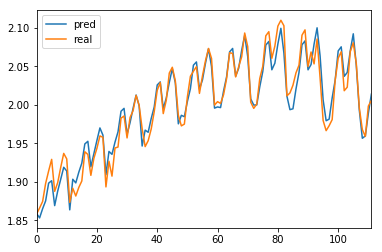

In [487]:
#  Сравним подгонку и ряд из логарифмов продаж
#Всё прошло отлично!

pred = pd.DataFrame({
    'pred': model.predict(X),
    'real': y})
pred.plot()

In [488]:
#Смотрим еще и по значением, убеждаемся что всё точно хорошо
pred.head(14)

,pred,real
0,1.858942,1.858236
1,1.853250,1.866110
2,1.865164,1.874540
3,1.875288,1.897957
4,1.898369,1.914184
5,1.901519,1.929215
6,1.869214,1.887730
7,1.887984,1.898999
8,1.903380,1.918712
9,1.918930,1.936966


In [489]:
print("Исторические данные за ", len(df), " месяцев")
print("Это составляет ", len(df)//12, " полных лет")
print("И еще ", len(df) % 12, " месяцев.")

Исторические данные за  112  месяцев
Это составляет  9  полных лет
И еще  4  месяцев.


In [490]:
#  Готовим матрицу значений предикторов df_3 
#  для вычисления прогнозов на 8 месяцев вперед
#  Сначала добавляем в нее время (номер месяца)

df_3= pd.DataFrame()

df_3['month_num'] = range(len(df_0)+1, len(df_0)+9)


In [491]:
df_3

,month_num
0,113
1,114
2,115
3,116
4,117
5,118
6,119
7,120


In [492]:
#  Добавляем индикаторы месяцев. Базового месяца снова не должно быть
#считаем с 4 по 12 месяц, т.к. от нас как раз и требуется прогноз с мая по декабрь
# df_3["m01"] = ([1,0,0,0,0,0,0,0,0,0,0,0])[0: 8 ]
df_3["m02"] = ([0,1,0,0,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m03"] = ([0,0,1,0,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m04"] = ([0,0,0,1,0,0,0,0,0,0,0,0])[4: 12 ]
df_3["m05"] = ([0,0,0,0,1,0,0,0,0,0,0,0])[4: 12 ]
df_3["m06"] = ([0,0,0,0,0,1,0,0,0,0,0,0])[4: 12 ]
df_3["m07"] = ([0,0,0,0,0,0,1,0,0,0,0,0])[4: 12 ]
df_3["m08"] = ([0,0,0,0,0,0,0,1,0,0,0,0])[4: 12 ]
df_3["m09"] = ([0,0,0,0,0,0,0,0,1,0,0,0])[4: 12 ]
df_3["m10"] = ([0,0,0,0,0,0,0,0,0,1,0,0])[4: 12 ]
df_3["m11"] = ([0,0,0,0,0,0,0,0,0,0,1,0])[4: 12 ]
df_3["m12"] = ([0,0,0,0,0,0,0,0,0,0,0,1])[4: 12 ]

In [493]:
df_3

,month_num,m02,m03,m04,m05,m06,m07,m08,m09,m10,m11,m12
0,113,0,0,0,1,0,0,0,0,0,0,0
1,114,0,0,0,0,1,0,0,0,0,0,0
2,115,0,0,0,0,0,1,0,0,0,0,0
3,116,0,0,0,0,0,0,1,0,0,0,0
4,117,0,0,0,0,0,0,0,1,0,0,0
5,118,0,0,0,0,0,0,0,0,1,0,0
6,119,0,0,0,0,0,0,0,0,0,1,0
7,120,0,0,0,0,0,0,0,0,0,0,1


In [494]:
#  Прогноз для логарфмов
model.predict(df_3)

array([2.05355442, 2.05910456, 2.02008471, 2.02347341, 2.05312073,
       2.07595375, 2.0302369 , 1.97155023])

In [495]:
#  Прогноз для исходного ряда
#Это те значения, которые мы ожидаем увидить в последующие ммесяцы работы гостиницы
y1 = 10**model.predict(df_3)
y1

array([113.12391211, 114.57887712, 104.73328099, 105.55368796,
       113.01100375, 119.11151589, 107.21039593,  93.65915306])

In [496]:
#  матрица с подгонкой
pred['forecast'] = np.nan

#  Все хорошо?
pred.head()

,pred,real,forecast
0,1.858942,1.858236,NaN
1,1.853250,1.866110,NaN
2,1.865164,1.874540,NaN
3,1.875288,1.897957,NaN
4,1.898369,1.914184,NaN


In [497]:
#  Продолжение предыдущей матрицы. 
#  Оно содержит спрогнозированные значения для месяцев с 85-го по 92-ый.
#  Для этих месяцев есть спрогнозированные значения, 
#  но нет исторических и подгонки.

#  Порядок столбцов не важен. 
#  Имена столбцов должны быть как в матрице pred ранее

pred_2 = pd.DataFrame(model.predict(df_3), columns=['forecast'])
pred_2['real'] = np.nan
pred_2['pred'] = np.nan

pred_2.head()

,forecast,real,pred
0,2.053554,NaN,NaN
1,2.059105,NaN,NaN
2,2.020085,NaN,NaN
3,2.023473,NaN,NaN
4,2.053121,NaN,NaN


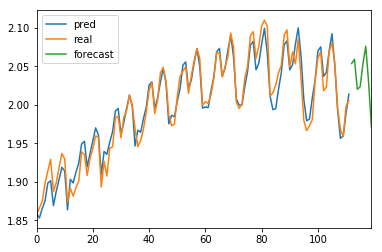

In [498]:
#  объединяем матрицы, задаем новые индексы
#Это матрица для логарифма, обязательно не забыть перейти обратно к исходной
pred_3 = pd.concat(
    [pred, pred_2],
    sort=False
).reset_index(drop=True)

pred_3.plot()

In [499]:
#  Возвращаемся к исходному ряду
pred_4 = 10**pred_3

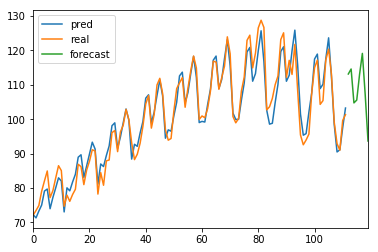

In [500]:
#Наш итоговый график, по нему довольно четко видно, что так примерно и должно быть, следуя тенденции 
#предыдущих месяцев
pred_4.plot()